In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
from sklearn.feature_selection import RFE, SelectKBest, chi2
from sklearn.preprocessing import StandardScaler
from sklearn.feature_selection import VarianceThreshold
import warnings
warnings.filterwarnings("ignore")

### 1. Create a Dataframe from the given data, perform basic EDA and check if data cleaning is required.

In [3]:
data = pd.read_csv('xAPI-Edu-Dataset.csv')
data.head()


,gender,NationalITy,PlaceofBirth,StageID,GradeID,SectionID,Topic,Semester,Relation,raisedhands,VisITedResources,AnnouncementsView,Discussion,ParentAnsweringSurvey,ParentschoolSatisfaction,StudentAbsenceDays,Class
0,M,KW,KuwaIT,lowerlevel,G-04,A,IT,F,Father,15,16,2,20,Yes,Good,Under-7,M
1,M,KW,KuwaIT,lowerlevel,G-04,A,IT,F,Father,20,20,3,25,Yes,Good,Under-7,M
2,M,KW,KuwaIT,lowerlevel,G-04,A,IT,F,Father,10,7,0,30,No,Bad,Above-7,L
3,M,KW,KuwaIT,lowerlevel,G-04,A,IT,F,Father,30,25,5,35,No,Bad,Above-7,L
4,M,KW,KuwaIT,lowerlevel,G-04,A,IT,F,Father,40,50,12,50,No,Bad,Above-7,M


In [4]:
data.describe()

,raisedhands,VisITedResources,AnnouncementsView,Discussion
count,480.000000,480.000000,480.000000,480.000000
mean,46.775000,54.797917,37.918750,43.283333
std,30.779223,33.080007,26.611244,27.637735
min,0.000000,0.000000,0.000000,1.000000
25%,15.750000,20.000000,14.000000,20.000000
50%,50.000000,65.000000,33.000000,39.000000
75%,75.000000,84.000000,58.000000,70.000000
max,100.000000,99.000000,98.000000,99.000000


In [5]:
data.info

<bound method DataFrame.info of     gender NationalITy PlaceofBirth       StageID GradeID SectionID  \
0        M          KW       KuwaIT    lowerlevel    G-04         A   
1        M          KW       KuwaIT    lowerlevel    G-04         A   
2        M          KW       KuwaIT    lowerlevel    G-04         A   
3        M          KW       KuwaIT    lowerlevel    G-04         A   
4        M          KW       KuwaIT    lowerlevel    G-04         A   
..     ...         ...          ...           ...     ...       ...   
475      F      Jordan       Jordan  MiddleSchool    G-08         A   
476      F      Jordan       Jordan  MiddleSchool    G-08         A   
477      F      Jordan       Jordan  MiddleSchool    G-08         A   
478      F      Jordan       Jordan  MiddleSchool    G-08         A   
479      F      Jordan       Jordan  MiddleSchool    G-08         A   

         Topic Semester Relation  raisedhands  VisITedResources  \
0           IT        F   Father           15   

In [7]:
data.shape

(480, 17)

In [8]:
data.columns

Index(['gender', 'NationalITy', 'PlaceofBirth', 'StageID', 'GradeID',
       'SectionID', 'Topic', 'Semester', 'Relation', 'raisedhands',
       'VisITedResources', 'AnnouncementsView', 'Discussion',
       'ParentAnsweringSurvey', 'ParentschoolSatisfaction',
       'StudentAbsenceDays', 'Class'],
      dtype='object')

In [6]:
print("\nChecking for null values:")
print(data.isnull().sum())
print("\nSummary statistics for numerical columns:")
print("\nSummary statistics for object columns:")
print(data.describe(include='object').T)


Checking for null values:
gender                      0
NationalITy                 0
PlaceofBirth                0
StageID                     0
GradeID                     0
SectionID                   0
Topic                       0
Semester                    0
Relation                    0
raisedhands                 0
VisITedResources            0
AnnouncementsView           0
Discussion                  0
ParentAnsweringSurvey       0
ParentschoolSatisfaction    0
StudentAbsenceDays          0
Class                       0
dtype: int64

Summary statistics for numerical columns:

Summary statistics for object columns:
                         count unique           top freq
gender                     480      2             M  305
NationalITy                480     14            KW  179
PlaceofBirth               480     14        KuwaIT  180
StageID                    480      3  MiddleSchool  248
GradeID                    480     10          G-02  147
SectionID                

In [10]:
for col in data.columns:
    print(col, ': ', len(data[col].unique()), 'labels')

gender :  2 labels
NationalITy :  14 labels
PlaceofBirth :  14 labels
StageID :  3 labels
GradeID :  10 labels
SectionID :  3 labels
Topic :  12 labels
Semester :  2 labels
Relation :  2 labels
raisedhands :  82 labels
VisITedResources :  89 labels
AnnouncementsView :  88 labels
Discussion :  90 labels
ParentAnsweringSurvey :  2 labels
ParentschoolSatisfaction :  2 labels
StudentAbsenceDays :  2 labels
Class :  3 labels


### Findings question1 

The dataset contains information about students in an educational setting, with a total of 480 rows and 17 columns.

There are no missing values in the dataset, which is a positive sign, as missing data can often complicate analysis and modeling. This suggests that the dataset is relatively clean and ready for further exploration.

The dataset includes both numerical and categorical features, making it suitable for various types of analysis

### 2. Visualize just the categorical features individually to see what options are included and how each option fares when it comes to count(how many times it appears) and see what can be deduce from that?

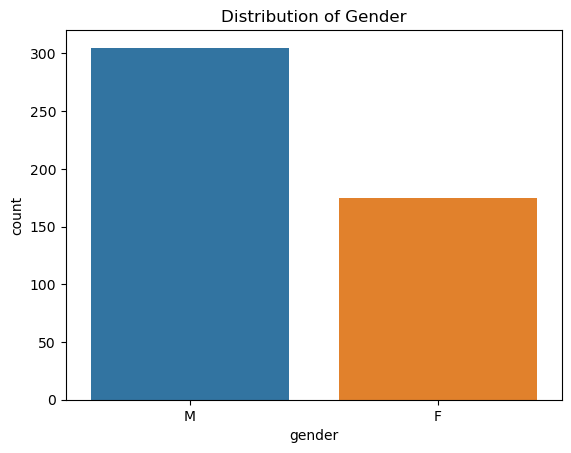

In [13]:
sns.countplot(data=data, x='gender')
plt.title('Distribution of Gender')
plt.show()


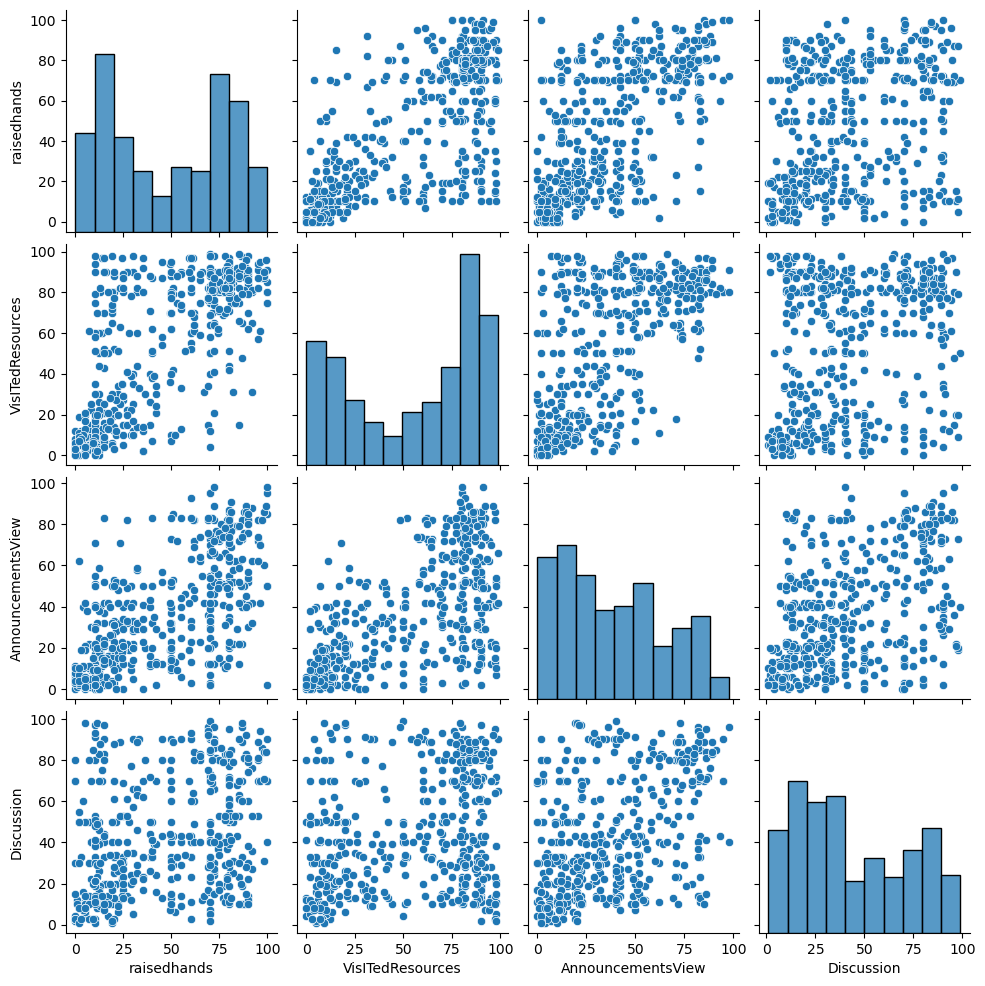

In [14]:
sns.pairplot(data)

In [15]:
pd.crosstab(data['ParentAnsweringSurvey'], data['Class'])

Class,H,L,M
ParentAnsweringSurvey,,,
No,28,99,83
Yes,114,28,128


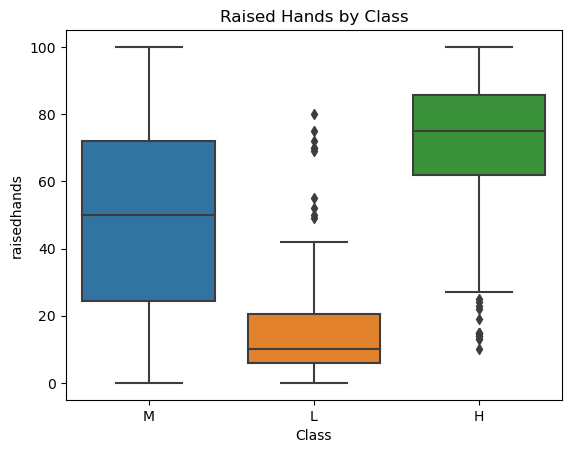

In [16]:
sns.boxplot(data=data, x='Class', y='raisedhands')
plt.title('Raised Hands by Class')
plt.show()


<Axes: xlabel='Semester', ylabel='count'>

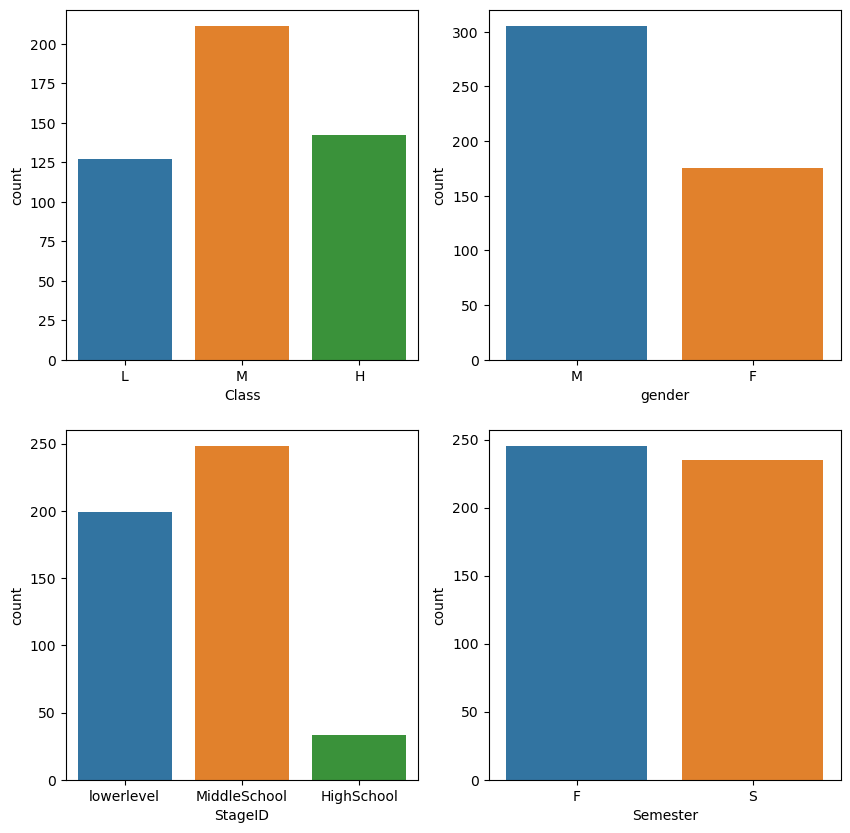

In [7]:
fig, axarr = plt.subplots(2, 2, figsize=(10, 10))
sns.countplot(x='Class', data=data, ax=axarr[0, 0], order=['L', 'M', 'H'])
sns.countplot(x='gender', data=data, ax=axarr[0, 1], order=['M', 'F'])
sns.countplot(x='StageID', data=data, ax=axarr[1, 0])
sns.countplot(x='Semester', data=data, ax=axarr[1, 1])

<Axes: xlabel='NationalITy', ylabel='count'>

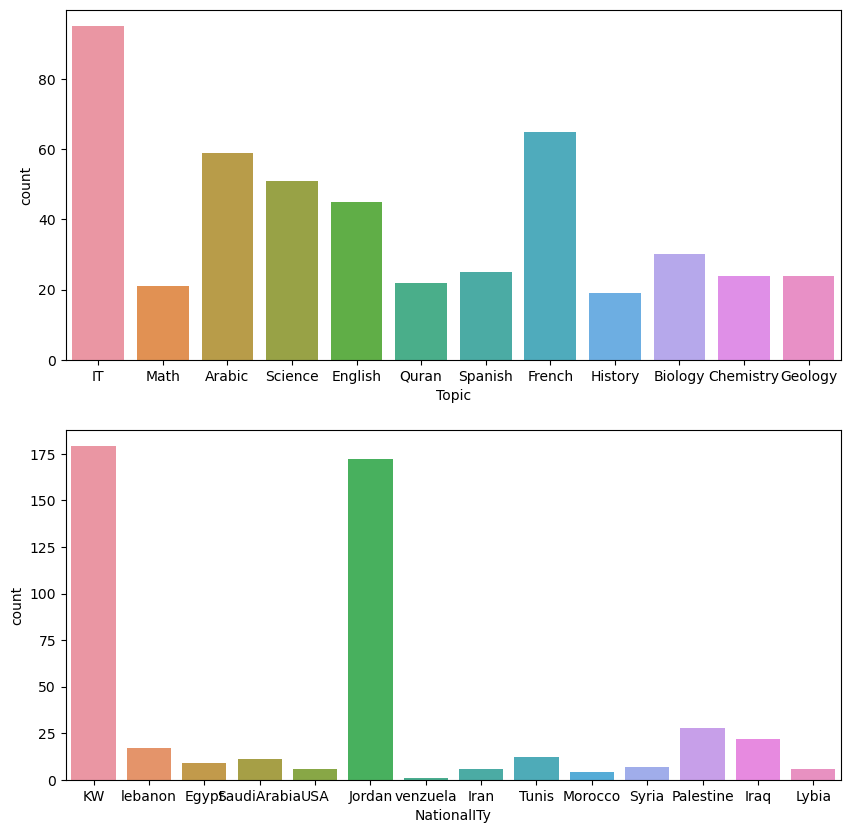

In [8]:
fig, (axis1, axis2) = plt.subplots(2, 1, figsize=(10, 10))
sns.countplot(x='Topic', data=data, ax=axis1)
sns.countplot(x='NationalITy', data=data, ax=axis2)

## Findings question 2

Categorical features like 'gender,' 'stage,' 'semester,' 'topic,' 'nationality,' 'relation,' 'student absence days,' and 'parent answering survey' have been visualized individually.

These visualizations provide insights into the distribution of each category within these features.

For example, we can see that there is more middle east country, maybe thatswhy there is such a large gender difference

### 3. Look at some categorical features in relation to each other, to see what insights could be possibly read?

<Axes: xlabel='gender', ylabel='count'>

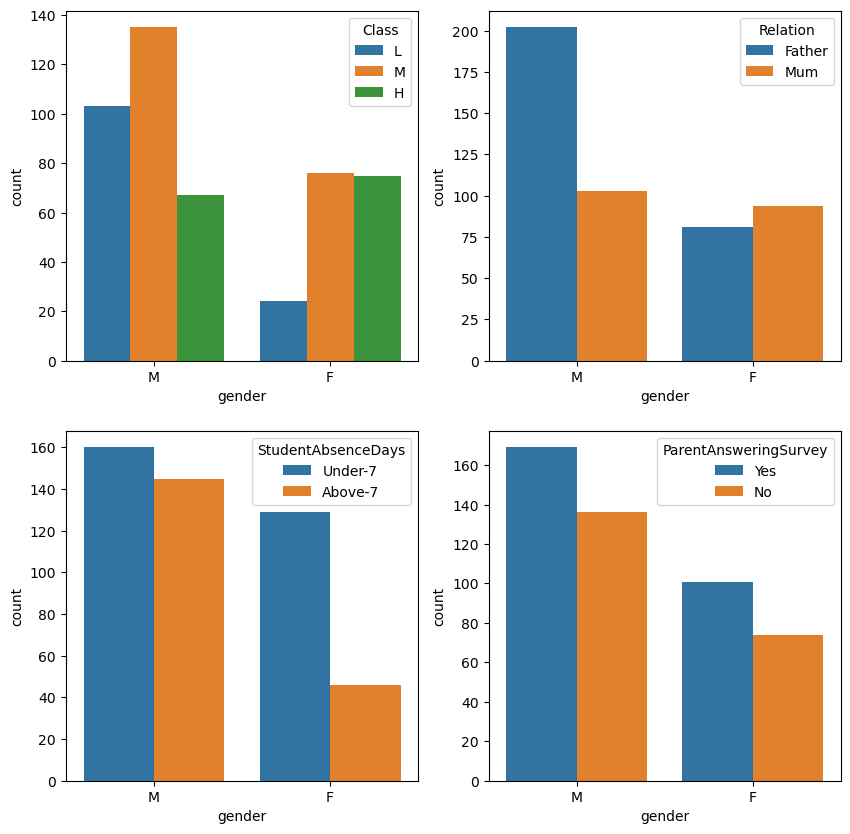

In [15]:
fig, axarr = plt.subplots(2, 2, figsize=(10, 10))
sns.countplot(x='gender', hue='Class', data=data, ax=axarr[0, 0], order=['M', 'F'], hue_order=['L', 'M', 'H'])
sns.countplot(x='gender', hue='Relation', data=data, ax=axarr[0, 1], order=['M', 'F'])
sns.countplot(x='gender', hue='StudentAbsenceDays', data=data, ax=axarr[1, 0], order=['M', 'F'])
sns.countplot(x='gender', hue='ParentAnsweringSurvey', data=data, ax=axarr[1, 1], order=['M', 'F'])

<Axes: xlabel='Class', ylabel='Discussion'>

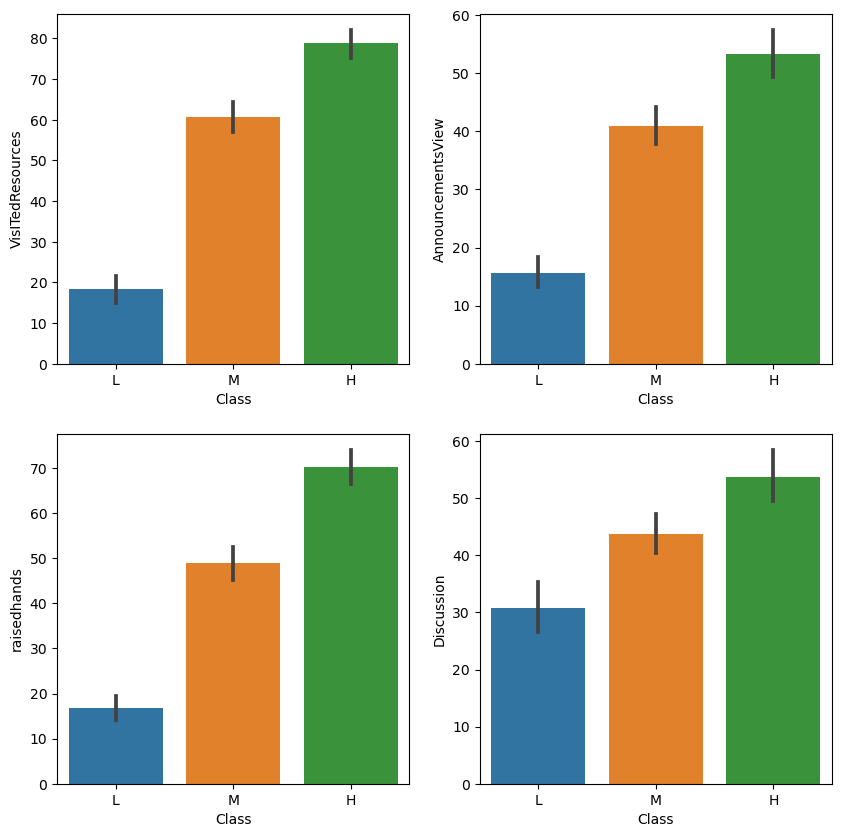

In [13]:
fig, axarr = plt.subplots(2, 2, figsize=(10, 10))
sns.barplot(x='Class', y='VisITedResources', data=data, order=['L', 'M', 'H'], ax=axarr[0, 0])
sns.barplot(x='Class', y='AnnouncementsView', data=data, order=['L', 'M', 'H'], ax=axarr[0, 1])
sns.barplot(x='Class', y='raisedhands', data=data, order=['L', 'M', 'H'], ax=axarr[1, 0])
sns.barplot(x='Class', y='Discussion', data=data, order=['L', 'M', 'H'], ax=axarr[1, 1])


## Findings answer 3

Certain categorical features have been compared to others to uncover potential relationships or patterns.

For instance, comparing 'gender' to 'class' reveals that female students ('F') tend to have higher grades ('M' and 'H') compared to male students ('M').

Similarly, the comparison of 'gender' to 'relation' suggests that mothers ('Mum') are more interested in their child's education compared to fathers ('Father').

### 4. Visualize categorical variables with numerical variables and give 



<Axes: xlabel='Semester', ylabel='AnnouncementsView'>

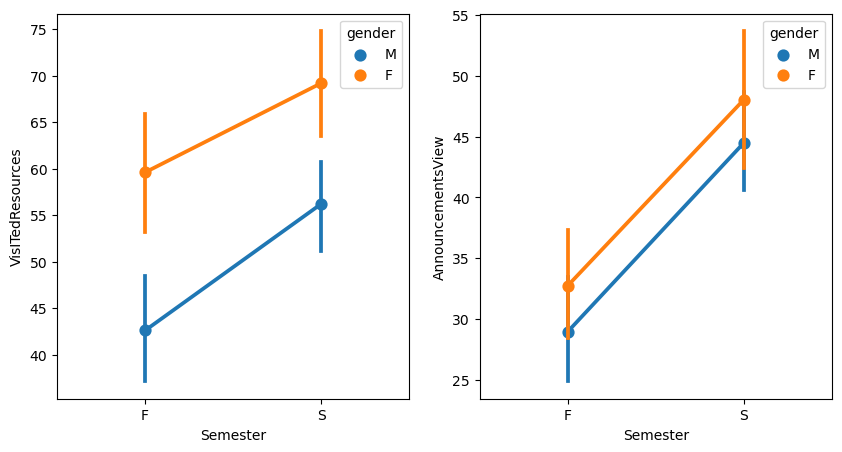

In [17]:
fig, (axis1, axis2) = plt.subplots(1, 2, figsize=(10, 5))
sns.pointplot(x='Semester', y='VisITedResources', hue='gender', data=data, ax=axis1)
sns.pointplot(x='Semester', y='AnnouncementsView', hue='gender', data=data, ax=axis2)

In [18]:
ave_raisedhands = data['raisedhands'].mean()
ave_VisITedResources = data['VisITedResources'].mean()
ave_AnnouncementsView = data['AnnouncementsView'].mean()

unsuccess = data[(data['raisedhands'] >= ave_raisedhands) & (data['VisITedResources'] >= ave_VisITedResources) & (data['AnnouncementsView'] >= ave_AnnouncementsView) & (data['Class'] == 'L')]

print("\nStudents with low grades and features above average:")
print(unsuccess)


Students with low grades and features above average:
    gender NationalITy PlaceofBirth       StageID GradeID SectionID  \
444      M      Jordan       Jordan  MiddleSchool    G-08         A   
445      M      Jordan       Jordan  MiddleSchool    G-08         A   

         Topic Semester Relation  raisedhands  VisITedResources  \
444  Chemistry        F      Mum           75                72   
445  Chemistry        S      Mum           72                76   

     AnnouncementsView  Discussion ParentAnsweringSurvey  \
444                 64          39                   Yes   
445                 66          40                   Yes   

    ParentschoolSatisfaction StudentAbsenceDays Class  
444                     Good            Above-7     L  
445                     Good            Above-7     L  


## Findings ans 4

Visualizations have been created to explore the relationship between categorical variables (e.g., 'gender') and numerical variables (e.g., 'VisITedResources,' 'AnnouncementsView').

These visualizations provide insights into how numerical variables vary with different categorical factors.

For example, it appears that female students ('F') tend to have higher 'VisITedResources' compared to male students ('M').

### 5. From the above result, what are the factors that leads to get low grades of the students?

In [20]:
data['numeric_class'] = data['Class'].map({'L': 1, 'M': 2, 'H': 3})


In [21]:
grade_male_ave = data[data.gender == 'M']['numeric_class'].mean()
grade_female_ave = data[data.gender == 'F']['numeric_class'].mean()

print("\nGender comparison of average grades:")
print(f"Male average grade: {grade_male_ave:.2f}")
print(f"Female average grade: {grade_female_ave:.2f}")


Gender comparison of average grades:
Male average grade: 1.88
Female average grade: 2.29


In [22]:
nation = data.NationalITy.unique()
nation_grades_ave = [data[data.NationalITy == i]['numeric_class'].mean() for i in nation]

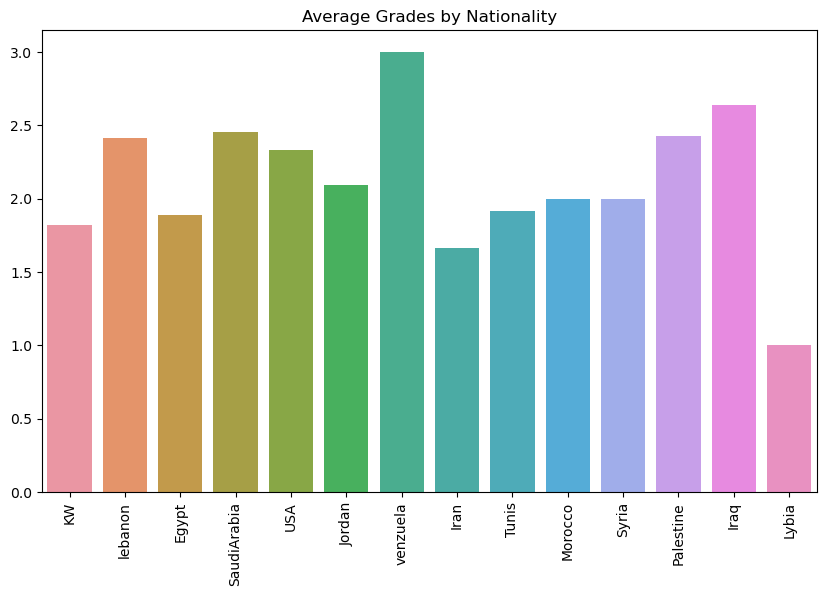

In [23]:
plt.figure(figsize=(10, 6))
ax = sns.barplot(x=nation, y=nation_grades_ave)
plt.xticks(rotation=90)
plt.title('Average Grades by Nationality')
plt.show()


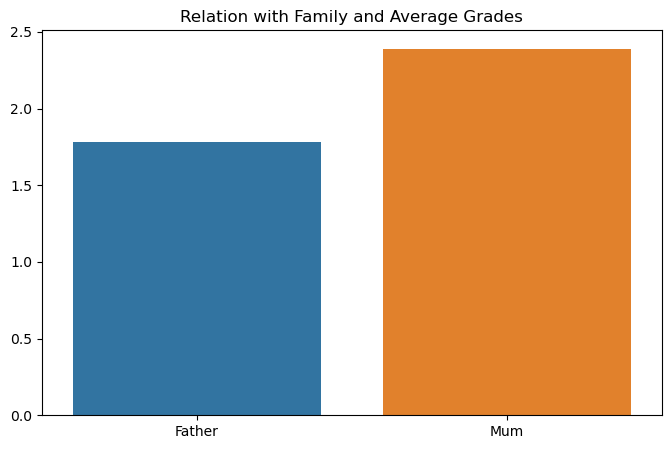

In [24]:
relation = data.Relation.unique()
relation_grade_ave = [data[data.Relation == i]['numeric_class'].mean() for i in relation]

plt.figure(figsize=(8, 5))
ax = sns.barplot(x=relation, y=relation_grade_ave)
plt.title('Relation with Family and Average Grades')
plt.show()

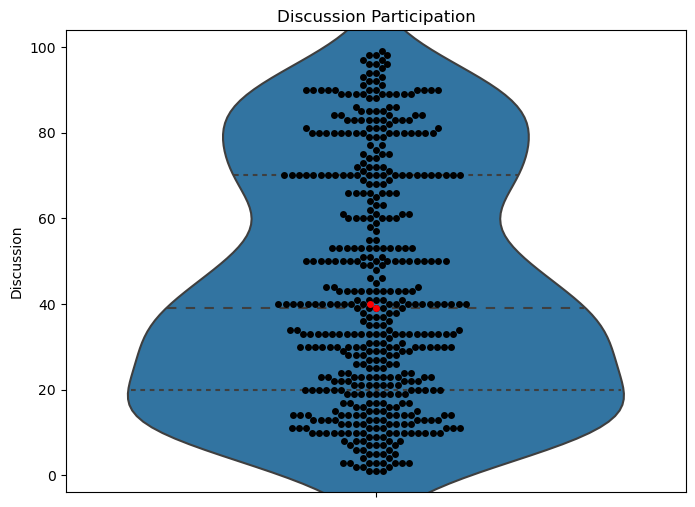

In [25]:
discussion_ave = data['Discussion'].mean()

plt.figure(figsize=(8, 6))
ax = sns.violinplot(y=data['Discussion'], split=True, inner='quart')
ax = sns.swarmplot(y=data['Discussion'], color='black')
ax = sns.swarmplot(y=unsuccess['Discussion'], color='red')
plt.title('Discussion Participation')
plt.show()

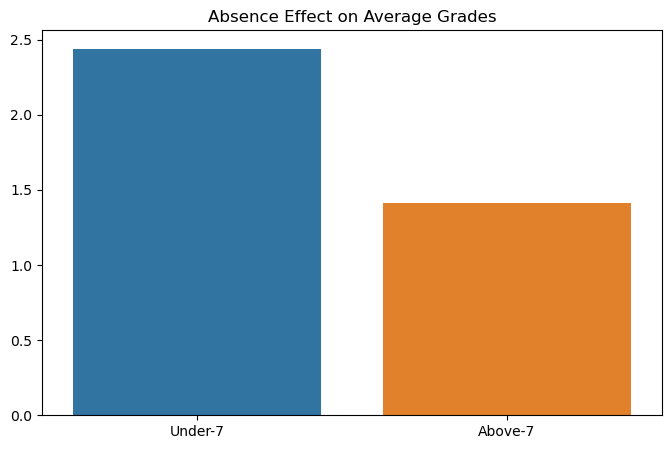

In [26]:
absence_day = data.StudentAbsenceDays.unique()
absence_day_ave = [data[data.StudentAbsenceDays == i]['numeric_class'].mean() for i in absence_day]

plt.figure(figsize=(8, 5))
ax = sns.barplot(x=absence_day, y=absence_day_ave)
plt.title('Absence Effect on Average Grades')
plt.show()



## Findings question 5

To identify factors contributing to low grades (Class 'L'), a filter was applied to select students with above-average participation in features like 'raisedhands,' 'VisITedResources,' and 'AnnouncementsView.'

This filtering suggests that despite active participation in these aspects, some students still received low grades ('L'). Further analysis is needed to uncover the additional factors influencing their performance.

### 6. Build classification model using Logistic Regression and present it's confusion matrix and classification report.


In [27]:
data1 = data.drop('Class', axis=1)
data_with_dummies = pd.get_dummies(data1, drop_first=True)

In [28]:
Features = data_with_dummies.drop(['numeric_class'], axis=1)
Target = data_with_dummies['numeric_class']

In [29]:
scaler = StandardScaler()
X = scaler.fit_transform(Features)

In [30]:
X_train, X_test, y_train, y_test = train_test_split(X, Target, test_size=0.3, random_state=45)

In [31]:
Logit_Model = LogisticRegression(max_iter=1000)
Logit_Model.fit(X_train, y_train)

y_pred = Logit_Model.predict(X_test)
y_pred_train = Logit_Model.predict(X_train)

print("\nAccuracy on the test set:", accuracy_score(y_test, y_pred))
print("\nConfusion Matrix on the test set:")
print(confusion_matrix(y_test, y_pred))
print("\nClassification Report on the test set:")
print(classification_report(y_test, y_pred))



Accuracy on the test set: 0.7361111111111112

Confusion Matrix on the test set:
[[26  3  1]
 [ 8 52 14]
 [ 0 12 28]]

Classification Report on the test set:
              precision    recall  f1-score   support

           1       0.76      0.87      0.81        30
           2       0.78      0.70      0.74        74
           3       0.65      0.70      0.67        40

    accuracy                           0.74       144
   macro avg       0.73      0.76      0.74       144
weighted avg       0.74      0.74      0.74       144



## Findings question 6
A logistic regression classification model was built to predict student grades based on various features.

The model's performance was evaluated using a confusion matrix and classification report.

The accuracy of the model on the test data was approximately 73.6%, indicating that it can make reasonably accurate predictions regarding student grades.

The classification report provides additional metrics such as precision, recall, and F1-score for each class ('L,' 'M,' 'H').

### 7. Justify the model. Tune the model using various techniques, if need be.

In [36]:
data.columns

Index(['gender', 'NationalITy', 'PlaceofBirth', 'StageID', 'GradeID',
       'SectionID', 'Topic', 'Semester', 'Relation', 'raisedhands',
       'VisITedResources', 'AnnouncementsView', 'Discussion',
       'ParentAnsweringSurvey', 'ParentschoolSatisfaction',
       'StudentAbsenceDays', 'Class', 'numeric_class'],
      dtype='object')

In [42]:
df = pd.read_csv('xAPI-Edu-Dataset.csv')

categorical_columns = ['gender', 'NationalITy', 'PlaceofBirth', 'StageID', 'GradeID',
                       'SectionID', 'Topic', 'Semester', 'Relation', 'ParentAnsweringSurvey',
                       'ParentschoolSatisfaction', 'StudentAbsenceDays']

df = pd.get_dummies(df, columns=categorical_columns)


X = df.drop('Class', axis=1)  
y = df['Class']  


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

logreg = LogisticRegression(random_state=42)

param_grid = {
    'penalty': ['l1', 'l2'],
    'C': [0.001, 0.01, 0.1, 1, 10, 100],
    'solver': ['liblinear', 'saga']
}

grid_search = GridSearchCV(logreg, param_grid, cv=5, scoring='accuracy', n_jobs=-1)

grid_search.fit(X_train, y_train)

best_params = grid_search.best_params_


final_logreg = LogisticRegression(**best_params, random_state=42)

final_logreg.fit(X_train, y_train)

y_pred = final_logreg.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)

print("Best Hyperparameters:", best_params)
print("Accuracy:", accuracy)
print("Confusion Matrix:\n", conf_matrix)
print("Classification Report:\n", class_report)


Best Hyperparameters: {'C': 1, 'penalty': 'l2', 'solver': 'liblinear'}
Accuracy: 0.71875
Confusion Matrix:
 [[12  0 10]
 [ 0 22  4]
 [ 6  7 35]]
Classification Report:
               precision    recall  f1-score   support

           H       0.67      0.55      0.60        22
           L       0.76      0.85      0.80        26
           M       0.71      0.73      0.72        48

    accuracy                           0.72        96
   macro avg       0.71      0.71      0.71        96
weighted avg       0.72      0.72      0.71        96



In [43]:
var = VarianceThreshold(threshold=0.025)
X_trans = var.fit_transform(Features)

from sklearn.linear_model import LogisticRegression

X_train, X_test, y_train, y_test = train_test_split(X_trans,Target, test_size = 0.30, random_state = 10)

clf = LogisticRegression()
# fit the model on scaled training data
logreg_with_var_thresh = clf.fit(X_train, y_train)

# use predict() to predict the class labels of target variable
y_pred = logreg_with_var_thresh.predict(X_test)

cfm=confusion_matrix(y_test,y_pred)
print(cfm)
Report = classification_report(y_test,y_pred)
print(Report)
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

[[31  8  0]
 [ 5 56  9]
 [ 0  9 26]]
              precision    recall  f1-score   support

           1       0.86      0.79      0.83        39
           2       0.77      0.80      0.78        70
           3       0.74      0.74      0.74        35

    accuracy                           0.78       144
   macro avg       0.79      0.78      0.78       144
weighted avg       0.79      0.78      0.79       144

Accuracy: 0.7847222222222222


## Findings question 7

Feature selection or engineering to improve model performance.

Hyperparameter tuning to optimize the logistic regression model.

Trying alternative machine learning algorithms to assess if a different model performs better.